<a href="https://colab.research.google.com/github/Tasfia48/Predictive_Policing/blob/master/Determining_Demographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_percent = pd.read_csv('/content/drive/My Drive/CPD/Areas/com_dis_percentage.csv')

In [12]:
df_percent_beat = pd.read_csv('/content/com_beat_percentage.csv')

In [13]:
df_percent_beat =df_percent_beat[['district','beat_num','community','intersection_area_perc']]
df_percent_beat

,district,beat_num,community,intersection_area_perc
0,1,133,DOUGLAS,100
1,2,211,DOUGLAS,100
2,2,212,DOUGLAS,100
3,2,213,DOUGLAS,100
4,2,214,DOUGLAS,100
...,...,...,...,...
712,20,2033,EDGEWATER,100
713,24,2432,EDGEWATER,100
714,24,2433,EDGEWATER,100
715,16,1611,EDISON PARK,100


In [14]:
df_percent = df_percent[['dist_num','community','intersection_area_perc']]
df_percent

,dist_num,community,intersection_area_perc
0,1,DOUGLAS,33.127688
1,2,DOUGLAS,66.450359
2,9,DOUGLAS,0.048560
3,2,OAKLAND,95.514118
4,2,FULLER PARK,22.066642
...,...,...,...
192,16,O'HARE,99.940868
193,31,O'HARE,0.001376
194,20,EDGEWATER,68.412191
195,24,EDGEWATER,31.587807


In [15]:
df_com_profile = pd.read_csv('/content/drive/My Drive/CPD/Areas/CommunityAreaProfiles20132017.csv')
df_com_profile

,GEOG,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,A65_74,A75_84,OV85,MED_AGE,WHITE,HISP,BLACK,ASIAN,OTHER,POP_HH,POP_16OV,IN_LBFRC,EMP,UNEMP,NOT_IN_LBFRC,WORK_AT_HOME,TOT_COMM,DROVE_AL,CARPOOL,TRANSIT,WALK_BIKE,COMM_OTHER,AGG_TT,NO_VEH,ONE_VEH,TWO_VEH,THREEOM_VEH,POP_25OV,LT_HS,HS,SOME_COLL,ASSOC,...,OTHER_UNSPEC,2000_WHITE,2000_HISP,2000_BLACK,2000_ASIAN,2000_OTHER,2000_UND19,2000_A20_34,2000_A35_49,2000_A50_64,2000_OV65,2000_MED_AGE,2000_TOT_HH,2000_OWN_OCC_HU,2000_RENT_OCC_HU,2000_VAC_HU,2000_HU_TOT,2000_LT_HS,2000_HS,2000_SOME_COLL,2000_ASSOC,2000_BACH,2000_GRAD_PROF,2000_POP_25OV,HT_Cost_Typical,HT_Cost_Mod,H_Cost_Typical,H_Cost_Mod,T_Cost_Typical,T_Cost_Mod,highly_walkable_pop_pct,highly_walkable_emp_pct,assoc_plus_pct,in_lbr_frc_pct,pct_pop_access_4_acres_per_1k,pct_pop_access_10_acres_per_1k,impervious_acres_per_hh,modhigh_ta_pop_pct,modhigh_ta_emp_pct,nonsov_pct
0,Albany Park,57655,51542,51992,13299,14031,11658,8134,2603,1573,694,33.665733,15608,24927,2401,7536,1520,50417,41342,29224,27098,2060,12118,919,25715,13090,2222,8606,1548,249,0,3289,7630,4204,1440,34480,7441,8478,5094,1843,...,684,15866,26741,1907,10178,2963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,0.390574,0.807084,0.000000,0.000000,0.050373,1.0,1.0,0.499174
1,Archer Heights,12644,13393,13142,4017,2827,2925,1818,970,323,261,33.354392,2213,10181,115,581,52,13141,9871,6561,5956,605,3310,109,5659,3638,741,988,262,30,0,613,1571,1135,575,8184,2357,3103,1415,309,...,0,6752,5485,74,48,285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.796716,0.159882,0.805830,0.000000,0.000000,0.270191,1.0,1.0,0.363994
2,Armour Square,12032,13391,13455,2634,2816,2376,2522,1540,1097,470,43.833739,1728,538,1218,9832,138,13431,11580,6620,5849,772,4960,183,5492,1984,934,1138,1265,170,0,2223,2053,788,143,9996,3351,3043,944,391,...,1,2062,448,2046,7305,171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,1.000000,0.265896,0.798455,0.200206,0.000000,0.097348,1.0,1.0,0.620298
3,Ashburn,39584,41081,43792,12999,8377,9200,8567,3031,999,619,35.872483,4745,16924,20837,315,971,43230,33341,22287,19383,2904,11054,409,18354,13110,2296,2777,44,127,0,984,4284,4943,2771,27420,4202,8428,6463,2617,...,255,14546,6674,17045,408,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.792998,0.621943,0.303683,0.787867,0.144637,0.000000,0.153915,1.0,1.0,0.294516
4,Auburn Gresham,55928,48743,46278,11696,9176,7871,9857,3810,2966,902,39.774642,324,862,44435,143,514,46163,37125,20714,16330,4376,16411,697,15311,9475,1136,4388,200,112,0,5216,7484,3485,926,31343,5224,9744,9357,2187,...,76,237,347,54862,45,437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.983347,0.995529,0.223910,0.698409,0.027726,0.000000,0.084098,1.0,1.0,0.401112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,West Lawn,29235,33355,33108,11067,7535,6990,4642,1748,805,321,31.228361,5033,26666,1152,185,72,33092,24565,16394,14241,2153,8171,168,13401,8882,2034,2019,445,21,0,796,3456,3063,1673,19893,6142,7064,3399,1086,...,0,12540,15179,760,272,484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.973451,0.494999,0.165284,0.787343,0.026699,0.000000,0.153769,1.0,1.0,0.343872
73,West Pullman,36649,29651,27742,7812,5719,4594,5351,2719,1178,368,36.247249,158,1682,25634,65,203,27676,21341,12895,9653,3242,8446,364,8992,6005,866,1796,163,161,0,1723,3953,2495,968,17794,2791,5481,5460,1215,...,114,328,1699,34277,16,329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600153,0.797681,0.228260,0.747825,0.182974,0.056618,0.120416,1.0,1.0,0.340913
74,West Ridge,73199,71942,76215,20756,17065,15001,13648,5461,2914,1370,35.251008,32173,14256,9201,17200,3385,74558,58939,38121,34858,3263,20818,1084,33060,19904,3370,6268,2857,661,0,3830,

In [16]:
df_com_profile_race = df_com_profile[['GEOG','TOT_POP','WHITE',	'HISP',	'BLACK',	'ASIAN',	'OTHER']]

In [17]:
df_com_profile_race

,GEOG,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER
0,Albany Park,51992,15608,24927,2401,7536,1520
1,Archer Heights,13142,2213,10181,115,581,52
2,Armour Square,13455,1728,538,1218,9832,138
3,Ashburn,43792,4745,16924,20837,315,971
4,Auburn Gresham,46278,324,862,44435,143,514
...,...,...,...,...,...,...,...
72,West Lawn,33108,5033,26666,1152,185,72
73,West Pullman,27742,158,1682,25634,65,203
74,West Ridge,76215,32173,14256,9201,17200,3385
75,West Town,84502,51498,21219,5630,3725,2430


In [18]:
df_com_profile_race['community'] = df_com_profile_race['GEOG'].str.upper()
df_com_profile_race=df_com_profile_race.drop(columns=['GEOG'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_merged = pd.merge(df_com_profile_race,df_percent, on='community', how='outer', validate="one_to_many")

In [20]:
df_merged_beat = pd.merge(df_com_profile_race,df_percent_beat, on='community', how='outer', validate="one_to_many")

In [21]:
#df_merged.sort_values(by='dist_num').head(10)

In [23]:
df_merged1=pd.DataFrame()
df_merged2=pd.DataFrame()
# df_merged1

In [ ]:
df_merged1['dist_num'] = df_merged['dist_num']
df_merged1['community'] = df_merged['community']
df_merged1['TOT_POP']=(df_merged['TOT_POP']*df_merged['intersection_area_perc'])/100
df_merged1['WHITE']=(df_merged['WHITE']*df_merged['intersection_area_perc'])/100
df_merged1['HISP']=(df_merged['HISP']*df_merged['intersection_area_perc'])/100
df_merged1['BLACK']=(df_merged['BLACK']*df_merged['intersection_area_perc'])/100
df_merged1['ASIAN']=(df_merged['ASIAN']*df_merged['intersection_area_perc'])/100
df_merged1['OTHER']=(df_merged['OTHER']*df_merged['intersection_area_perc'])/100

In [24]:
df_merged2['DISTRICT'] = df_merged_beat['district']
df_merged2['BEAT'] = df_merged_beat['beat_num']
df_merged2['COMMUNITY'] = df_merged_beat['community']
df_merged2['TOT_POP']=(df_merged_beat['TOT_POP']*df_merged_beat['intersection_area_perc'])/100
df_merged2['WHITE']=(df_merged_beat['WHITE']*df_merged_beat['intersection_area_perc'])/100
df_merged2['HISP']=(df_merged_beat['HISP']*df_merged_beat['intersection_area_perc'])/100
df_merged2['BLACK']=(df_merged_beat['BLACK']*df_merged_beat['intersection_area_perc'])/100
df_merged2['ASIAN']=(df_merged_beat['ASIAN']*df_merged_beat['intersection_area_perc'])/100
df_merged2['OTHER']=(df_merged_beat['OTHER']*df_merged_beat['intersection_area_perc'])/100

In [25]:
#df_merged1.sort_values(by='dist_num').head(10)

In [27]:
df_merged_new_beat =df_merged2.groupby(['DISTRICT','BEAT']).sum().reset_index()

In [ ]:
df_merged_new =df_merged1.groupby(['dist_num']).sum().reset_index()

In [28]:
df_merged_new_beat

,DISTRICT,BEAT,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER
0,1,111,124773.0,85751.0,7776.0,11994.0,16208.0,3044.0
1,1,112,35880.0,22244.0,2471.0,3945.0,6226.0,994.0
2,1,113,35880.0,22244.0,2471.0,3945.0,6226.0,994.0
3,1,114,148393.0,96814.0,9023.0,17531.0,21306.0,3719.0
4,1,121,98752.0,48366.0,8716.0,22096.0,17006.0,2568.0
...,...,...,...,...,...,...,...,...
270,25,2532,95260.0,4403.0,12398.0,76989.0,483.0,987.0
271,25,2533,255741.0,20833.0,129325.0,99694.0,2870.0,3020.0
272,25,2534,80571.0,5685.0,52145.0,20602.0,825.0,1314.0
273,25,2535,153617.0,39244.0,83938.0,24259.0,3172.0,3004.0


In [29]:
df_18 = df_merged_new_beat[df_merged_new_beat['DISTRICT']==18]
df_1 = df_merged_new_beat[df_merged_new_beat['DISTRICT']==1]


In [32]:
df_18

,DISTRICT,BEAT,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER
205,18,1811,314151.0,202076.0,62763.0,20542.0,20707.0,8063.0
206,18,1812,67710.0,53512.0,4446.0,3206.0,4653.0,1893.0
207,18,1813,156603.0,117019.0,9751.0,11255.0,14635.0,3943.0
208,18,1814,156603.0,117019.0,9751.0,11255.0,14635.0,3943.0
209,18,1821,156603.0,117019.0,9751.0,11255.0,14635.0,3943.0
210,18,1822,241105.0,168517.0,30970.0,16885.0,18360.0,6373.0
211,18,1823,88893.0,63507.0,5305.0,8049.0,9982.0,2050.0
212,18,1824,156603.0,117019.0,9751.0,11255.0,14635.0,3943.0
213,18,1831,272147.0,163371.0,35240.0,35775.0,30713.0,7048.0
214,18,1832,88893.0,63507.0,5305.0,8049.0,9982.0,2050.0


In [36]:
def plot_demo(df,district_no):
  temp = df[df['DISTRICT']==district_no]
  columns=temp[['WHITE',	'HISP', 'BLACK',	'ASIAN',	'OTHER']]
  plt.figure(figsize=(10,8))
  sns.set(font_scale = 1.5)
  sns.heatmap(columns,yticklabels=temp['BEAT'].values,cmap='YlGnBu')
  plt.xlabel("Race", fontsize=20)
  plt.ylabel('Police Beats', fontsize=20)

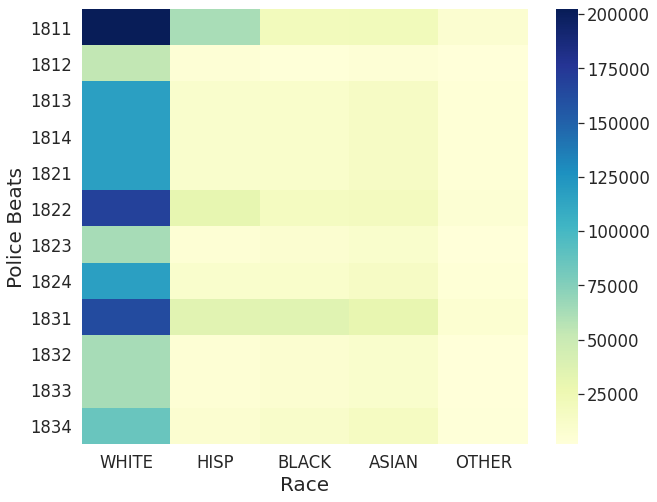

In [39]:
plot_demo(df_merged_new_beat,18)

Text(58.5, 0.5, 'Police Beats')

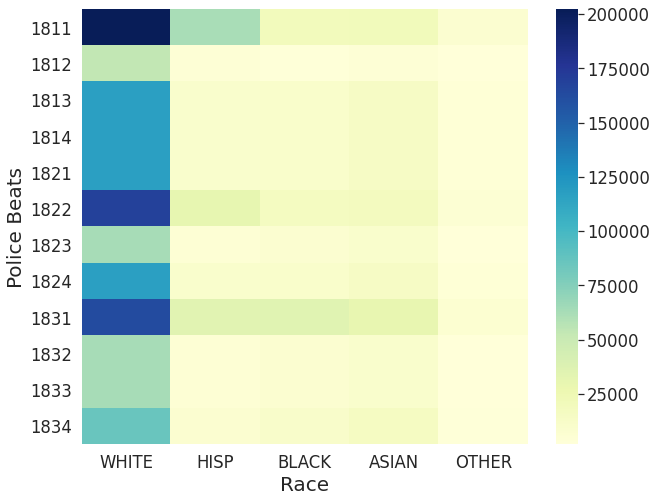

In [30]:
columns=df_18[['WHITE',	'HISP', 'BLACK',	'ASIAN',	'OTHER']]
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.5)
sns.heatmap(columns,yticklabels=df_18['BEAT'].values,cmap='YlGnBu')
plt.xlabel("Race", fontsize=20)
plt.ylabel('Police Beats', fontsize=20)

Text(58.5, 0.5, 'Police Beats')

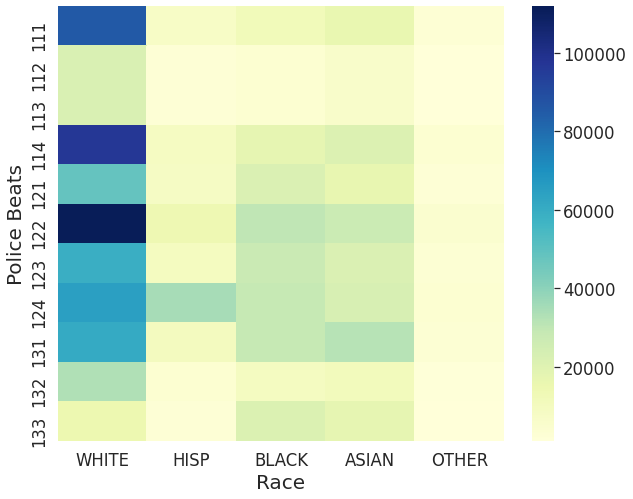

In [40]:
columns=df_1[['WHITE',	'HISP', 'BLACK',	'ASIAN',	'OTHER']]
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.5)
sns.heatmap(columns,yticklabels=df_1['BEAT'].values,cmap='YlGnBu')
plt.xlabel("Race", fontsize=20)
plt.ylabel('Police Beats', fontsize=20)

In [ ]:
df_merged_new = df_merged_new.sort_values(by='dist_num')
df_merged_new = df_merged_new.apply(np.ceil) 

In [ ]:
df_merged_new['dist_num']=df_merged_new['dist_num'].astype('int64')
df_merged_new

,dist_num,TOT_POP,WHITE,HISP,BLACK,ASIAN,OTHER
0,1,73234.0,36429.0,4665.0,16577.0,13587.0,1978.0
1,2,95361.0,16157.0,3813.0,65279.0,7122.0,2993.0
2,3,74382.0,4745.0,1650.0,65319.0,1330.0,1340.0
3,4,123207.0,9790.0,35759.0,76525.0,248.0,887.0
4,5,71313.0,1312.0,2723.0,66422.0,186.0,672.0
5,6,87133.0,1170.0,2073.0,82699.0,261.0,932.0
6,7,57873.0,523.0,2931.0,53630.0,71.0,721.0
7,8,259108.0,45380.0,159287.0,48454.0,3191.0,2798.0
8,9,163887.0,24579.0,93720.0,14855.0,29409.0,1326.0
9,10,109192.0,5559.0,67517.0,34747.0,590.0,780.0


In [ ]:
columns=df_merged_new[['WHITE',	'HISP', 'BLACK',	'ASIAN',	'OTHER']]

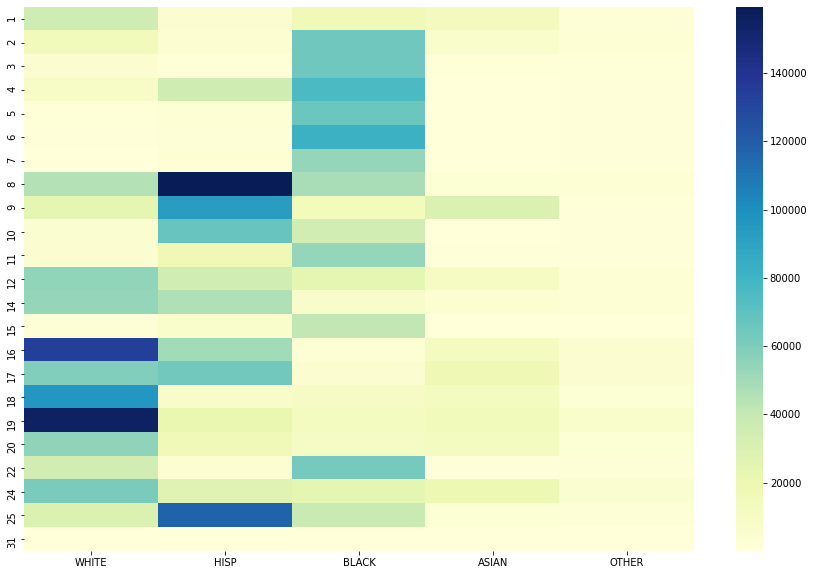

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(columns,yticklabels=df_merged_new['dist_num'].values,cmap='YlGnBu')

In [ ]:
df_16 = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/29-FEB-2016 thru 16-JAN-2018 - ISR - JUV Redacted.csv')
df_18 = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/01-JAN-18 thru 01-JAN-19 - ISR- JUV Redacted.csv')
df_19 = pd.read_csv('/content/drive/My Drive/CPD/Stop Data/ISR-1-Jan-2018--31-Dec-2019-Juv-Redacted.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,10,12,13,15,17,18,21,22,28,34,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,58,62,63,64,71,73,74,99,101,102,103,109,110,116,118,119,120,121,122,131,133,137,138,139,140,141,142,143,145,146,147,148,149,151,152,153,154,155,156,158,160,162,165,168) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,11,12,13,14,16,18,19,22,23,29,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,59,63,64,65,72,74,75,99,100,101,102,103,104,109,110,111,120,121,132,134,138,139,140,141,142,143,144,145,146,147,148,149,150,152,153,154,155,156,157,159,161,163,166,169) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/

In [ ]:
beatwise_df = pd.concat([ df_16,df_18], ignore_index=True)

In [ ]:
beatwise_df = pd.concat([ beatwise_df,df_19], ignore_index=True)

In [ ]:
beatwise_df.to_csv('Stop_data(2016-2019).csv')

In [ ]:
df_crime = pd.read_csv('/content/drive/My Drive/Chicago_Crimes_2012_to_2017.csv')

In [ ]:
df_crime

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
df_district24 = df_crime[ df_crime['District']==24]

In [ ]:
df_district24

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
34,7704,10509139,HZ250777,05/03/2016 10:30:00 PM,010XX W GRANVILLE AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,APARTMENT,False,False,2433,24.0,48.0,77.0,14,1167960.0,1941343.0,2016,05/10/2016 03:56:50 PM,41.994589,-87.657523,"(41.994588742, -87.657522554)"
81,17988,10509800,HZ251202,05/03/2016 10:00:00 PM,065XX N WHIPPLE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2412,24.0,50.0,2.0,07,1154820.0,1943117.0,2016,05/10/2016 03:56:50 PM,41.999731,-87.705810,"(41.99973106, -87.705809711)"
107,24067,10510107,HZ251653,05/03/2016 05:00:00 PM,063XX N HERMITAGE AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,2433,24.0,40.0,77.0,06,1163624.0,1941880.0,2016,05/10/2016 03:56:50 PM,41.996155,-87.673457,"(41.996155077, -87.673457065)"
134,30474,10511543,HZ252763,05/03/2016 06:00:00 PM,061XX N WINTHROP AVE,0820,THEFT,$500 AND UNDER,OTHER,False,False,2433,24.0,48.0,77.0,06,1167747.0,1940929.0,2016,05/10/2016 03:56:50 PM,41.993457,-87.658318,"(41.993457327, -87.658318065)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456507,6235973,10822625,JA123201,01/18/2017 09:53:00 PM,063XX N ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,2413,24.0,50.0,2.0,11,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
1456549,6236015,10825580,JA126859,01/18/2017 03:00:00 AM,028XX W JARVIS AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,2411,24.0,50.0,2.0,06,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
1456637,6236105,10827765,JA129130,01/13/2017 08:32:00 AM,027XX W FITCH AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,False,2411,24.0,50.0,2.0,26,NaN,NaN,2017,01/25/2017 03:54:12 PM,NaN,NaN,NaN
1456649,6236117,10827874,JA129097,12/20/2016 08:00:00 AM,074XX N RIDGE BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2424,24.0,49.0,1.0,11,NaN,NaN,2016,01/25/2017 03:54:12 PM,NaN,NaN,NaN


In [ ]:
df_district24_stop =beatwise_df[beatwise_df['DISTRICT']==24]

In [ ]:
df_district24_stop

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,APT_NO,CITY,STATE_CD,ZIP_CD,HALF_ADDRESS_I,DISTRICT,SECTOR,BEAT,AREA,...,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,OTHER_INVENTORY_NO,S_OTHER_I,S_OTHER_DESCR,S_OTHER_INVENTORY_NO,NAME,RD_NO
83,20033830,INVSTG,ISR000033830,2/29/2016 14:16,14,2461,N,OLIVE COLORED SWEAT PANTS/BLACK JACKET,NaN,NaN,7717,4699,24,743710,2/29/2016 16:55,743710,2/29/2016 17:41,19,NaN,M,BLK,511,155,SLN,BRO,BLK,SHORT,LBR,7605,N,PAULINA ST,NaN,CHICAGO,IL,60626,NaN,24,242,2422,3,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,20033852,INVSTG,ISR000033852,2/29/2016 15:35,15,2432,N,BLUE JEANS BLACK JACKET BLACK BASEBALL CAP,NaN,NaN,1606008922,NaN,24,731134,2/29/2016 17:34,NaN,NaN,26,NaN,M,WHT,604,215,SLN,BLU,BLN,SHORT,LGT,1263,W,PRATT BLVD,NaN,CHICAGO,IL,60626,NaN,24,243,2432,3,...,N,NaN,3,NaN,ARR,19272154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,20033843,INVSTG,ISR000033843,2/29/2016 16:19,16,2461,N,BLUE JEANS/GREY JACKET,NaN,NaN,9884,4699,24,743710,2/29/2016 17:18,743710,2/29/2016 17:39,39,NaN,M,BLK,510,140,SLN,BRO,BLK,BALD,LBR,1416,W,MORSE AVE,NaN,CHICAGO,IL,60626,NaN,24,243,2431,3,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,20033946,INVSTG,ISR000033946,2/29/2016 22:01,22,2463,N,"BLACK JACKET, BLACK JEANS, NIKE SHOES, BLACK B...",N,NaN,14810,713648,24,87086,2/29/2016 22:49,87086,2/29/2016 23:25,21,NaN,M,WHT,509,150,MED,HAZ,BRO,SHORT,FAR,2615,W,DEVON AVE,NaN,CHICAGO,IL,60659,NaN,24,241,2413,3,...,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LATIN KINGS,NaN
190,20033959,INVSTG,ISR000033959,2/29/2016 22:01,22,2463,N,BLACK BULLS HOODIE WITH BLUE JEANS,NaN,NaN,14810,713648,24,373260,2/29/2016 23:20,373260,2/29/2016 23:25,25,NaN,M,WWH,509,150,MED,BRO,BLK,SHORT,MED,2615,W,DEVON AVE,NaN,CHICAGO,IL,60659,NaN,24,241,2413,3,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LATIN KINGS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660315,24785043,INVSTG,ISR004785043,31-DEC-2019 18:26,18,2462,N,"GREEN JACKET, JEANS",Y,NaN,10850,NaN,24,631253,01-JAN-2020 18:41,NaN,NaN,25,NaN,M,WHT,509,160,MED,BRO,BLN,SHORT,LGT,73XX,N,DAMEN AVE,NaN,CHICAGO,IL,60645,NaN,24,242,2424,3,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN

In [ ]:
df_district24_stop=df_district24_stop[(df_district24_stop['ENFORCEMENT_TYPE_CD'] =='ARR') & (df_district24_stop['ENFORCEMENT_ACTION_TAKEN_I']=="Y" )]

In [ ]:
df_district24_stop.to_csv('district24arrestedstops.csv')